In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC



## Problem Statement

Predict whether a loan is approved or not by using machine learning algorithm considering supervised problem.

## Data Gathering

In [2]:
df = pd.read_csv("loan_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


## Exporatory Data Analysis

In [3]:
df.shape        

(381, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [5]:
df.describe()               # check statistical analysis

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [6]:
df["Gender"].value_counts()

Male      291
Female     85
Name: Gender, dtype: int64

In [7]:
df["Married"].value_counts()

Yes    228
No     153
Name: Married, dtype: int64

In [8]:
df["Dependents"].value_counts()

0     234
2      59
1      52
3+     28
Name: Dependents, dtype: int64

In [9]:
df["Education"].value_counts()

Graduate        278
Not Graduate    103
Name: Education, dtype: int64

In [10]:
df["Self_Employed"].value_counts()

No     325
Yes     35
Name: Self_Employed, dtype: int64

In [11]:
df["ApplicantIncome"].value_counts()

2500    8
2600    5
4583    4
2583    4
3750    4
       ..
150     1
3850    1
3430    1
2479    1
4106    1
Name: ApplicantIncome, Length: 322, dtype: int64

In [12]:
df["CoapplicantIncome"].value_counts()

0.0       175
1666.0      4
2500.0      4
1459.0      3
1800.0      3
         ... 
1083.0      1
3021.0      1
983.0       1
1775.0      1
1950.0      1
Name: CoapplicantIncome, Length: 182, dtype: int64

In [13]:
df["LoanAmount"].value_counts()

120.0    19
110.0    16
100.0    15
128.0    11
113.0    11
         ..
59.0      1
63.0      1
101.0     1
48.0      1
40.0      1
Name: LoanAmount, Length: 101, dtype: int64

In [14]:
df["Loan_Amount_Term"].value_counts()

360.0    312
180.0     29
480.0     11
300.0      7
120.0      3
84.0       3
240.0      2
60.0       1
12.0       1
36.0       1
Name: Loan_Amount_Term, dtype: int64

In [15]:
df["Credit_History"].value_counts()

1.0    294
0.0     57
Name: Credit_History, dtype: int64

In [16]:
df["Property_Area"].value_counts()

Semiurban    149
Urban        126
Rural        106
Name: Property_Area, dtype: int64

In [17]:
# checking balanced or imbalanced data

In [18]:
df["Loan_Status"].value_counts()     # we need to balance our data 

Y    271
N    110
Name: Loan_Status, dtype: int64

### Detect missing values

In [19]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

### Detect Outliers

<AxesSubplot:>

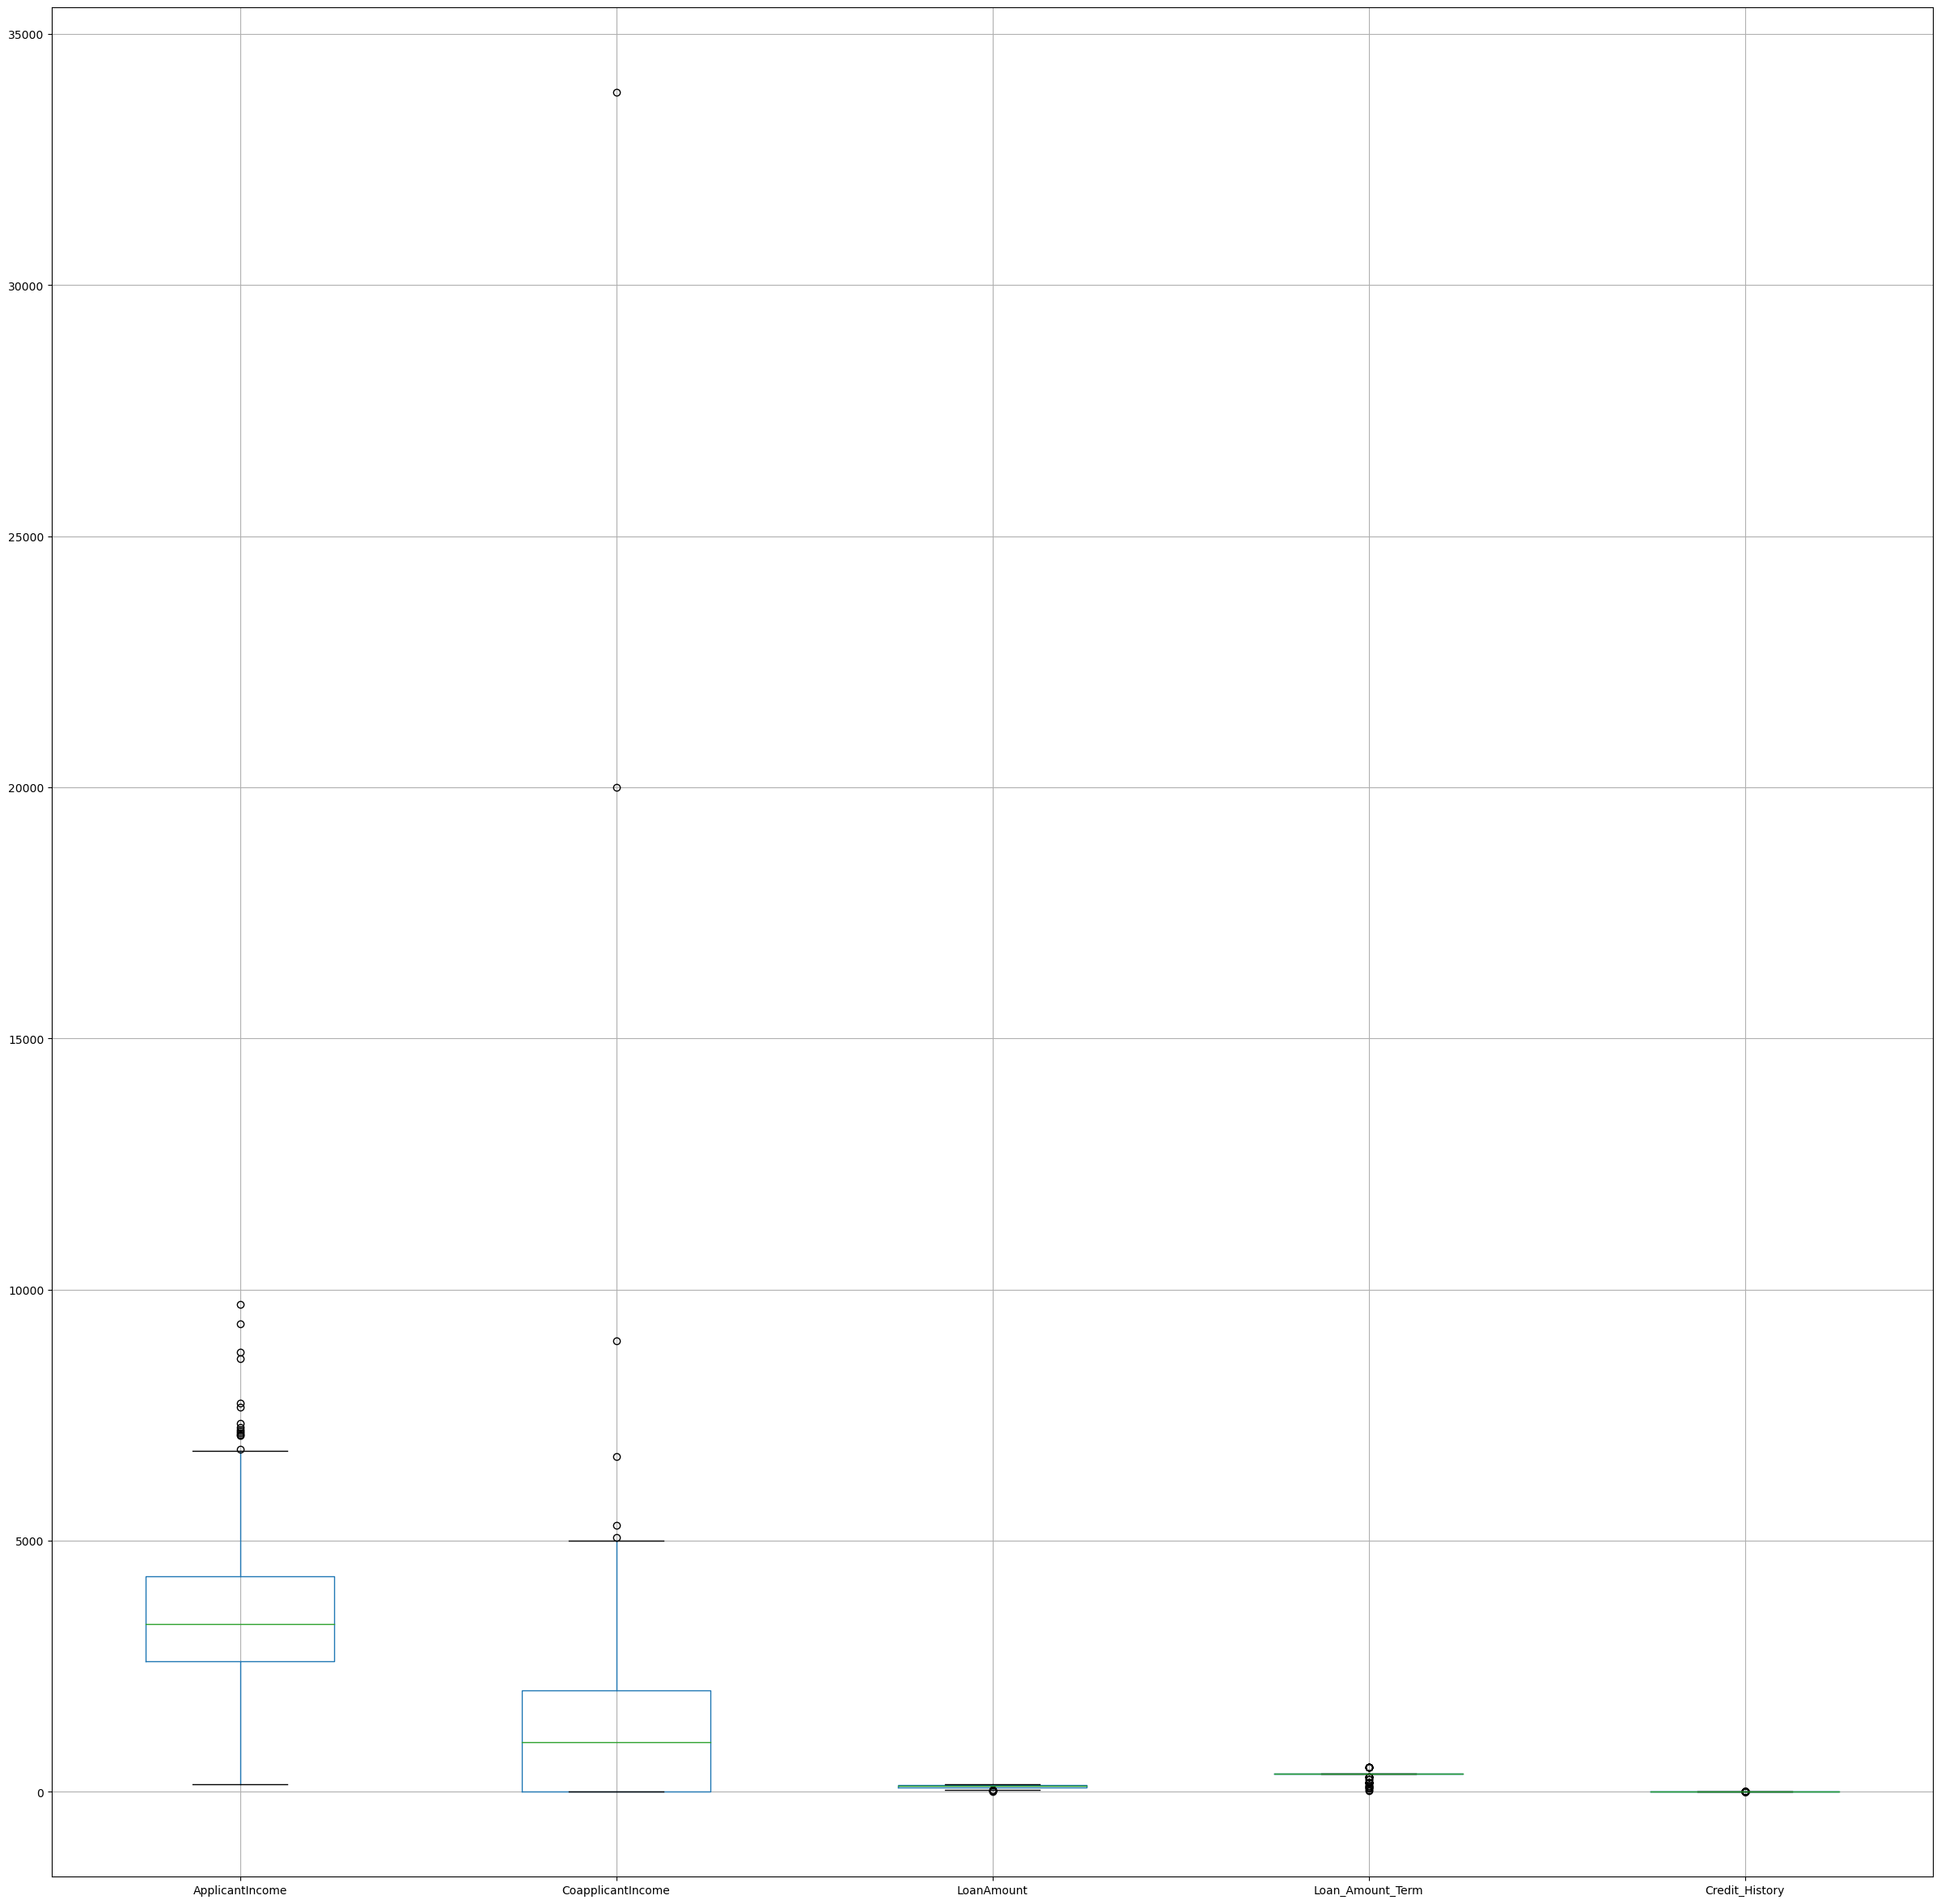

In [20]:
plt.figure(figsize = (30,30))       
df.boxplot()

## Feture Engineering

In [21]:
# drop id column

In [22]:
df.drop("Loan_ID",axis = 1,inplace = True)

### Imput Missing values

In [23]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

In [24]:
# after imputing missing values

In [25]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Encoding

In [26]:
df["Gender"].replace({"Male":0,"Female":1},inplace = True)
df["Married"].replace({"Yes":1,"No":0},inplace = True)
df["Education"].replace({"Graduate":1,"Not Graduate":0},inplace = True)
df["Self_Employed"].replace({"Yes":1,"No":0},inplace = True)
df["Property_Area"].replace({"Semiurban":0,"Urban":1,"Rural":2},inplace = True)
df["Loan_Status"].replace({"Y":1,"N":0},inplace = True)
df = pd.get_dummies(df, columns = ["Dependents"])

In [27]:
Gender = ({"Male":0,"Female":1})
Gender

{'Male': 0, 'Female': 1}

In [28]:
Married = ({"Yes":0,"No":1})
Education = ({"Graduate":0,"Not Graduate":1})
Self_Employed = ({"Yes":0,"No":1})
Property_Area = ({"Semiurban":0,"Urban":1,"Rural":2})
Loan_Status = ({"Y":0,"N":1})

### Sampling

In [29]:
x = df.drop("Loan_Status",axis = 1)
y = df["Loan_Status"]
random_over = RandomOverSampler(sampling_strategy = 0.8)

x_sample, y_sample = random_over.fit_resample(x,y)
y_sample.value_counts()

1    271
0    216
Name: Loan_Status, dtype: int64

In [30]:
x_sample

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,0,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0,1,0,0
1,0,1,1,1,3000,0.0,66.0,360.0,1.0,1,1,0,0,0
2,0,1,0,0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0
3,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0
4,0,1,0,0,2333,1516.0,95.0,360.0,1.0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0,1,1,0,4566,0.0,100.0,360.0,1.0,1,0,0,1,0
483,0,0,1,0,3418,0.0,127.0,360.0,1.0,0,1,0,0,0
484,0,0,0,0,3358,0.0,80.0,36.0,1.0,0,1,0,0,0
485,0,1,0,0,4050,5302.0,138.0,360.0,1.0,2,0,1,0,0


### reducing the impact of outliers 

### scalling

In [31]:
normal_scalar = MinMaxScaler()

array = normal_scalar.fit_transform(x_sample)

x_normal_df = pd.DataFrame(array, columns=x_sample.columns)
x_normal_df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,0.0,1.0,1.0,0.0,0.464043,0.044567,0.843972,0.743590,1.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.298336,0.000000,0.404255,0.743590,1.0,0.5,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.254684,0.069687,0.787234,0.743590,1.0,0.5,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.612373,0.000000,0.936170,0.743590,1.0,0.5,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.228515,0.044803,0.609929,0.743590,1.0,0.5,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.0,1.0,1.0,0.0,0.462263,0.000000,0.645390,0.743590,1.0,0.5,0.0,0.0,1.0,0.0
483,0.0,0.0,1.0,0.0,0.342091,0.000000,0.836879,0.743590,1.0,0.0,1.0,0.0,0.0,0.0
484,0.0,0.0,0.0,0.0,0.335811,0.000000,0.503546,0.051282,1.0,0.0,1.0,0.0,0.0,0.0
485,0.0,1.0,0.0,0.0,0.408249,0.156692,0.914894,0.743590,1.0,1.0,0.0,1.0,0.0,0.0


In [32]:
x = x_normal_df
y = y_sample

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
model_details = []
testing_accuracy_list = []
training_accuracy_list = []

## Model Building & Model Evaluation

### Logistic Regression

0.794344473007712

              precision    recall  f1-score   support

           0       0.60      0.88      0.71       112
           1       0.94      0.76      0.84       277

    accuracy                           0.79       389
   macro avg       0.77      0.82      0.78       389
weighted avg       0.84      0.79      0.80       389



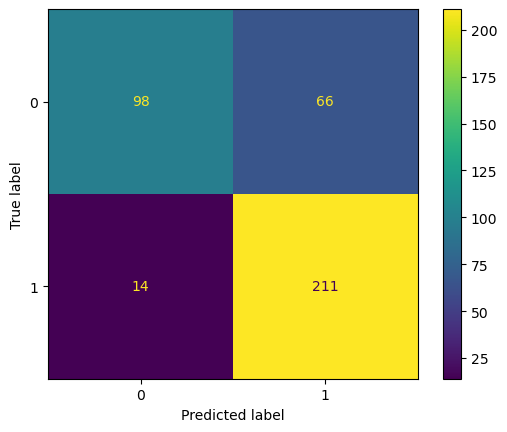

In [35]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
model_details.append("logistic_regression_with_normal_scalar ")

y_pred_train = logistic_model.predict(x_train)

plot_confusion_matrix(logistic_model,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)


0.7653061224489796

              precision    recall  f1-score   support

           0       0.62      0.91      0.74        35
           1       0.93      0.68      0.79        63

    accuracy                           0.77        98
   macro avg       0.78      0.80      0.76        98
weighted avg       0.82      0.77      0.77        98



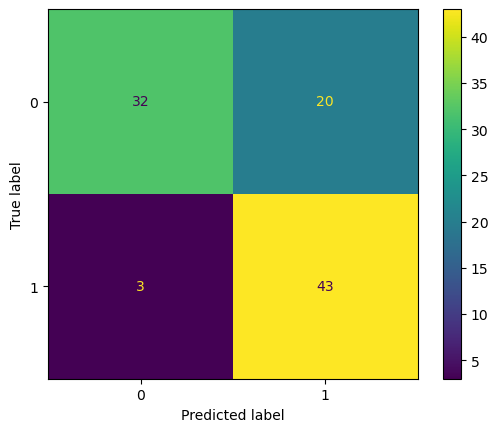

In [36]:
y_pred_test = logistic_model.predict(x_test)

plot_confusion_matrix(logistic_model,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)



print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

### Decision Tree

In [37]:
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=11)

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       225

    accuracy                           1.00       389
   macro avg       1.00      1.00      1.00       389
weighted avg       1.00      1.00      1.00       389



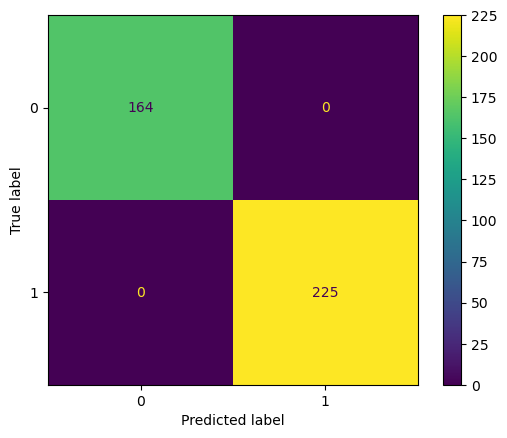

In [38]:
model_details.append("Decision_Tree_normal_scalar")

y_pred_train = dt_clf.predict(x_train)

plot_confusion_matrix(dt_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.9081632653061225

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        55
           1       0.87      0.93      0.90        43

    accuracy                           0.91        98
   macro avg       0.91      0.91      0.91        98
weighted avg       0.91      0.91      0.91        98



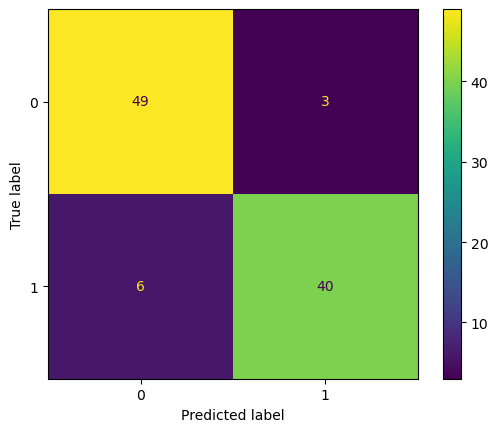

In [39]:
y_pred_test = dt_clf.predict(x_test)

plot_confusion_matrix(dt_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)



print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

### Decision Tree with hyperparameter tuning

In [40]:
import time
t1 = time.time()

dt_model = DecisionTreeClassifier(random_state=11)

hyperparameter = {"criterion":['gini', 'entropy'], 
                 "max_depth": np.arange(3,8),
                 "min_samples_split": np.arange(2,20),
                 "min_samples_leaf": np.arange(2,15)}  
gscv_dt_clf = GridSearchCV(dt_model, hyperparameter, cv=5,n_jobs=-1)
gscv_dt_clf.fit(x_train, y_train)

t2 = time.time()
print("Required Time :", t2-t1, "sec")

model_details.append("Decision_Tree_Hyperparameter tuning_with_normal_scalar ")


Required Time : 11.350667953491211 sec


In [41]:
gscv_dt_clf.best_estimator_             # best estimators

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, random_state=11)

0.87146529562982

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       150
           1       0.92      0.87      0.89       239

    accuracy                           0.87       389
   macro avg       0.86      0.87      0.87       389
weighted avg       0.88      0.87      0.87       389



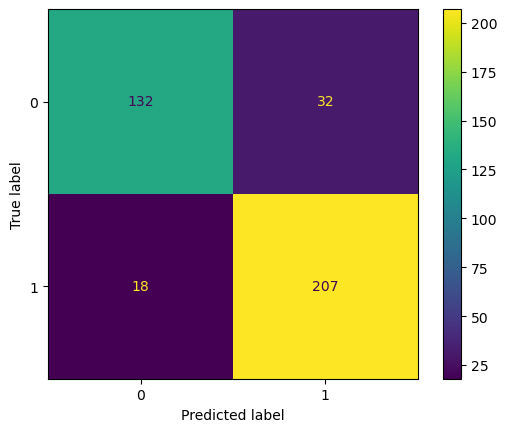

In [42]:
# Training Accuracy

y_pred_train = gscv_dt_clf.predict(x_train)

plot_confusion_matrix(gscv_dt_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.826530612244898

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        47
           1       0.87      0.78      0.82        51

    accuracy                           0.83        98
   macro avg       0.83      0.83      0.83        98
weighted avg       0.83      0.83      0.83        98



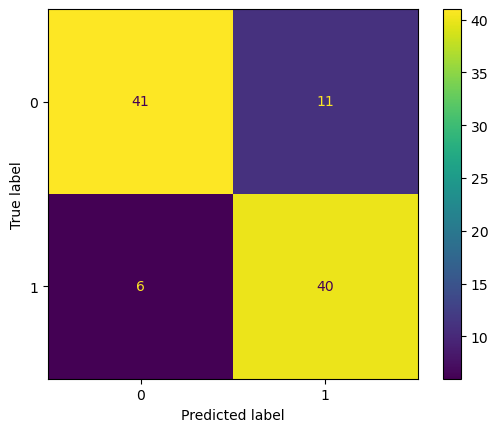

In [43]:
# testing accuracy

y_pred_test = gscv_dt_clf.predict(x_test)

plot_confusion_matrix(gscv_dt_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

### Random Forest

In [44]:
rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(x_train, y_train)
model_details.append("Random Forest with normal_scalar ")

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       225

    accuracy                           1.00       389
   macro avg       1.00      1.00      1.00       389
weighted avg       1.00      1.00      1.00       389



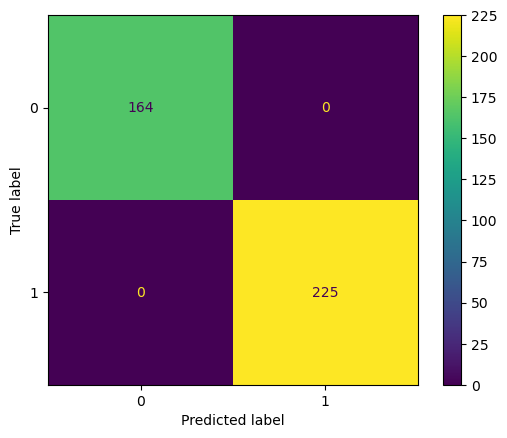

In [45]:
# Training Accuracy

y_pred_train = rf_clf.predict(x_train)

plot_confusion_matrix(rf_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.9081632653061225

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        47
           1       0.96      0.86      0.91        51

    accuracy                           0.91        98
   macro avg       0.91      0.91      0.91        98
weighted avg       0.91      0.91      0.91        98



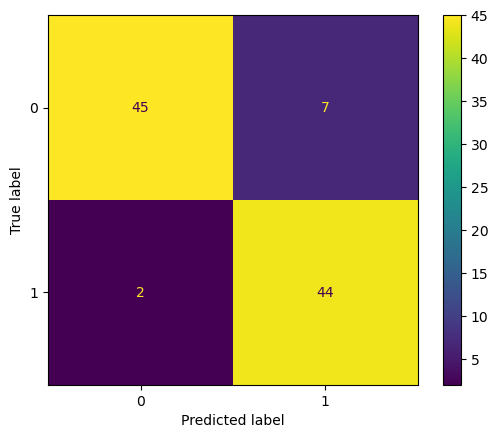

In [46]:
# testing accuracy

y_pred_test = rf_clf.predict(x_test)

plot_confusion_matrix(rf_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

### Random Forest With Hyperparameter Tuning

In [47]:
rf_model = RandomForestClassifier(random_state=10)

param_grid = {
                "n_estimators": np.arange(10,200),
                "criterion" : ['gini', 'entropy'],
                "max_depth" : np.arange(3,8),
                "min_samples_split" : np.arange(4,20),
                "min_samples_leaf": np.arange(3,10),
                "max_features" : ['sqrt', 'log2'],
                "oob_score" : [True]}

gscv_rf_model = RandomizedSearchCV(rf_model, param_grid, cv = 5)
gscv_rf_model.fit(x_train, y_train)

model_details.append("Random _Forest  Hyperparameter tuning with normal_scalar ")


In [48]:
gscv_rf_model.best_estimator_

RandomForestClassifier(max_depth=6, max_features='log2', min_samples_leaf=7,
                       min_samples_split=17, n_estimators=78, oob_score=True,
                       random_state=10)

0.8611825192802056

              precision    recall  f1-score   support

           0       0.69      0.97      0.81       116
           1       0.99      0.81      0.89       273

    accuracy                           0.86       389
   macro avg       0.84      0.89      0.85       389
weighted avg       0.90      0.86      0.87       389



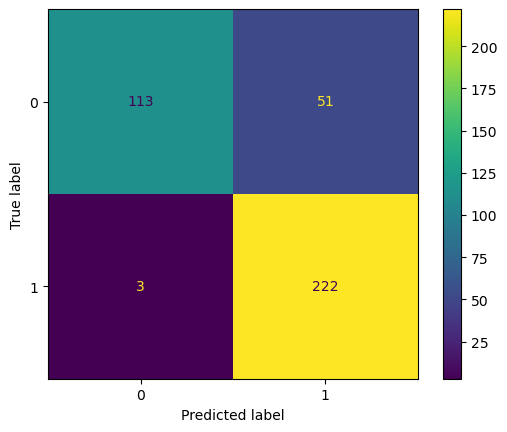

In [49]:
# Training Accuracy


y_pred_train = gscv_rf_model.predict(x_train)

plot_confusion_matrix(gscv_rf_model,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.8061224489795918

              precision    recall  f1-score   support

           0       0.67      0.95      0.79        37
           1       0.96      0.72      0.82        61

    accuracy                           0.81        98
   macro avg       0.81      0.83      0.80        98
weighted avg       0.85      0.81      0.81        98



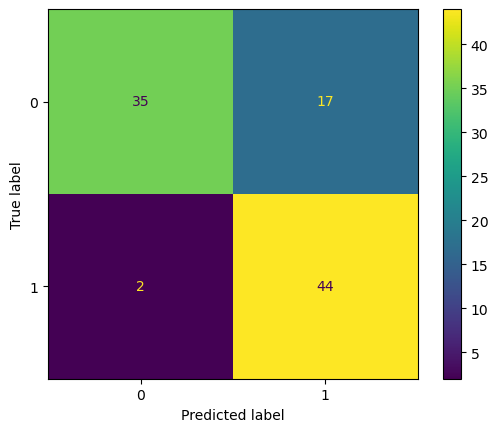

In [50]:
#testing accuracy

y_pred_test = gscv_rf_model.predict(x_test)

plot_confusion_matrix(gscv_rf_model,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

### AdaBost

In [51]:
adb_clf = AdaBoostClassifier(random_state=30)
adb_clf.fit(x_train, y_train)

model_details.append("AdaBost with normal_scalar ")


0.897172236503856

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       144
           1       0.96      0.88      0.91       245

    accuracy                           0.90       389
   macro avg       0.89      0.90      0.89       389
weighted avg       0.90      0.90      0.90       389



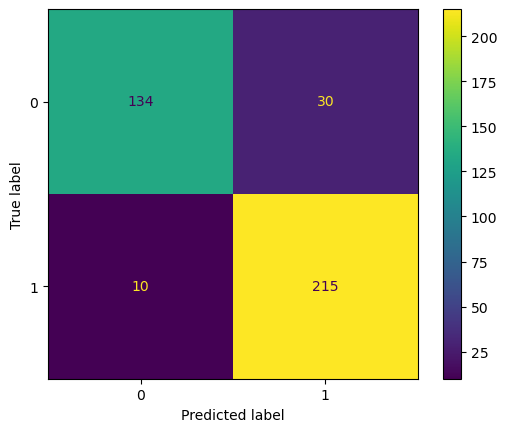

In [52]:
# Training Accuracy

y_pred_train = adb_clf.predict(x_train)

plot_confusion_matrix(adb_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.8061224489795918

              precision    recall  f1-score   support

           0       0.75      0.87      0.80        45
           1       0.87      0.75      0.81        53

    accuracy                           0.81        98
   macro avg       0.81      0.81      0.81        98
weighted avg       0.81      0.81      0.81        98



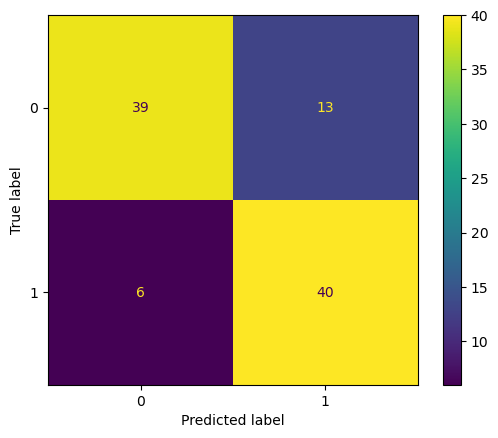

In [53]:
# testing accuracy

y_pred_test = adb_clf.predict(x_test)

plot_confusion_matrix(adb_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

### Adabost with hyperparameter tuning

In [54]:
adb_clf = AdaBoostClassifier(random_state=30)

param_grid = {
            "n_estimators" : np.arange(10,200,2),
            "learning_rate" : np.arange(0,2,0.001)
                }

gscv_adb_clf = RandomizedSearchCV(adb_clf, param_grid, cv=7)
gscv_adb_clf.fit(x_train, y_train)
gscv_adb_clf.best_estimator_
model_details.append("AdaBost hyperparameter_tuning with normal_scalar ")

0.9768637532133676

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       163
           1       0.98      0.98      0.98       226

    accuracy                           0.98       389
   macro avg       0.98      0.98      0.98       389
weighted avg       0.98      0.98      0.98       389



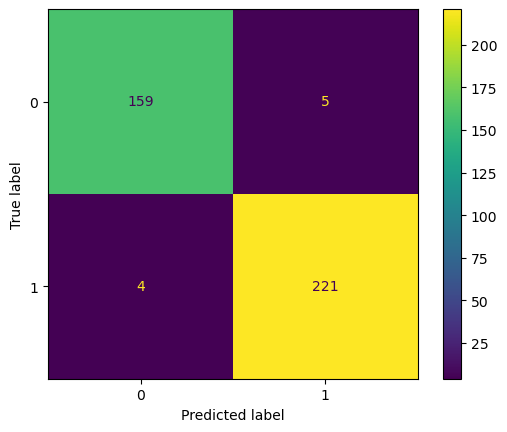

In [55]:
# Training Accuracy

y_pred_train = gscv_adb_clf.predict(x_train)

plot_confusion_matrix(gscv_adb_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.8673469387755102

              precision    recall  f1-score   support

           0       0.87      0.88      0.87        51
           1       0.87      0.85      0.86        47

    accuracy                           0.87        98
   macro avg       0.87      0.87      0.87        98
weighted avg       0.87      0.87      0.87        98



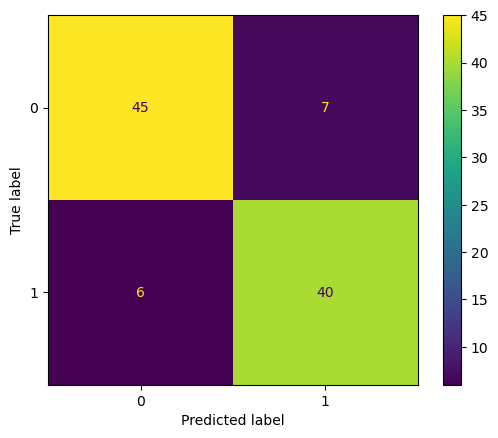

In [56]:
# testing accuracy

y_pred_test = gscv_adb_clf.predict(x_test)

plot_confusion_matrix(gscv_adb_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

### K Nearesr Neighbour on Normalized data

In [57]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
model_details.append("Knn_Normalization Model")

0.8534704370179949

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       153
           1       0.90      0.86      0.88       236

    accuracy                           0.85       389
   macro avg       0.85      0.85      0.85       389
weighted avg       0.86      0.85      0.85       389



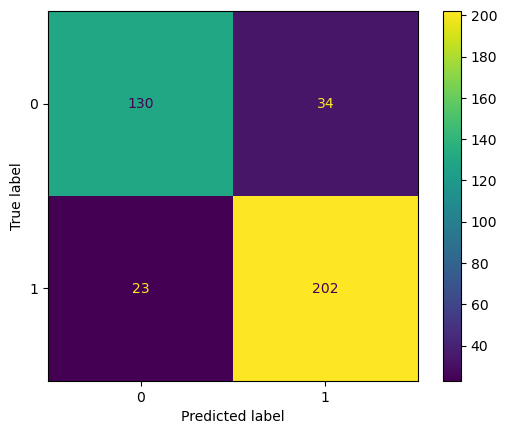

In [58]:
# Training Accuracy

y_pred_train = knn_clf.predict(x_train)

plot_confusion_matrix(knn_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.7551020408163265

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        44
           1       0.83      0.70      0.76        54

    accuracy                           0.76        98
   macro avg       0.76      0.76      0.76        98
weighted avg       0.77      0.76      0.76        98



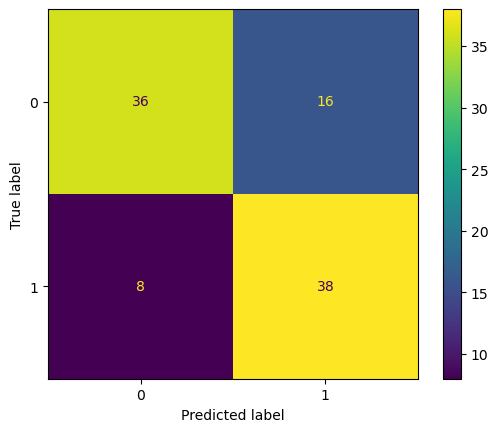

In [59]:
# testing accuracy

y_pred_test = knn_clf.predict(x_test)

plot_confusion_matrix(knn_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

### Knn(normalization)with hyperparameter tuning

In [60]:
knn_clf = KNeighborsClassifier()

param_grid = {"n_neighbors" : np.arange(3,30),
                  "p": [1,2]}

gscv_knn_clf = GridSearchCV(knn_clf, param_grid, cv = 5 , n_jobs = -1) 
gscv_knn_clf.fit(x_train, y_train) 
gscv_knn_clf.best_estimator_

model_details.append("knn_normalized_model_with_Hyperparameter Tuning")

In [61]:
(gscv_knn_clf.best_params_)         # best estimator

{'n_neighbors': 3, 'p': 1}

0.9254498714652957

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       165
           1       0.93      0.94      0.94       224

    accuracy                           0.93       389
   macro avg       0.92      0.92      0.92       389
weighted avg       0.93      0.93      0.93       389



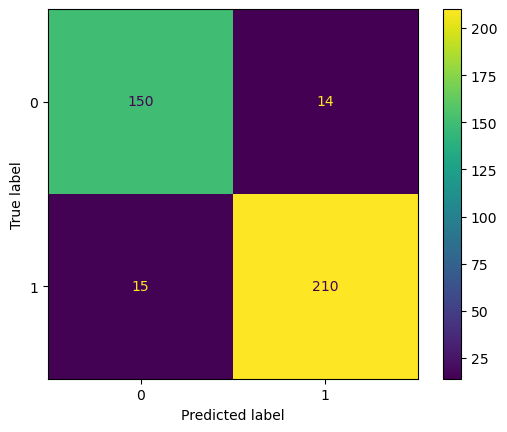

In [62]:
# Training Accuracy

y_pred_train = gscv_knn_clf.predict(x_train)

plot_confusion_matrix(gscv_knn_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.8163265306122449

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        52
           1       0.80      0.80      0.80        46

    accuracy                           0.82        98
   macro avg       0.82      0.82      0.82        98
weighted avg       0.82      0.82      0.82        98



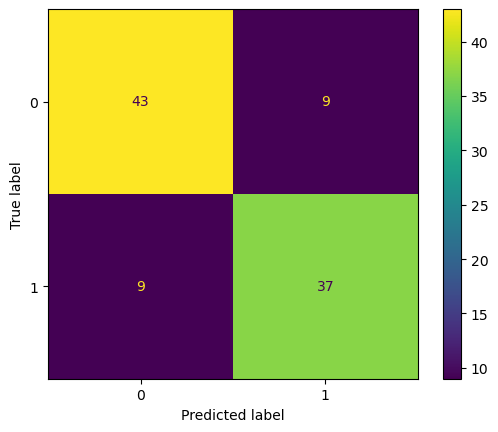

In [63]:
# testing accuracy

y_pred_test = gscv_knn_clf.predict(x_test)

plot_confusion_matrix(gscv_knn_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

### svm

In [64]:
svm_clf = SVC()
svm_clf.fit(x_train, y_train)
model_details.append("SVM with normal_scalar ")

0.8123393316195373

              precision    recall  f1-score   support

           0       0.63      0.89      0.74       117
           1       0.94      0.78      0.85       272

    accuracy                           0.81       389
   macro avg       0.79      0.83      0.80       389
weighted avg       0.85      0.81      0.82       389



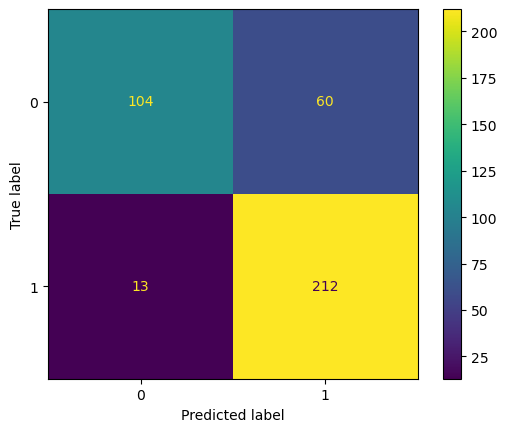

In [65]:
y_pred_train = svm_clf.predict(x_train)

plot_confusion_matrix(svm_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.7653061224489796

              precision    recall  f1-score   support

           0       0.63      0.89      0.74        37
           1       0.91      0.69      0.79        61

    accuracy                           0.77        98
   macro avg       0.77      0.79      0.76        98
weighted avg       0.81      0.77      0.77        98



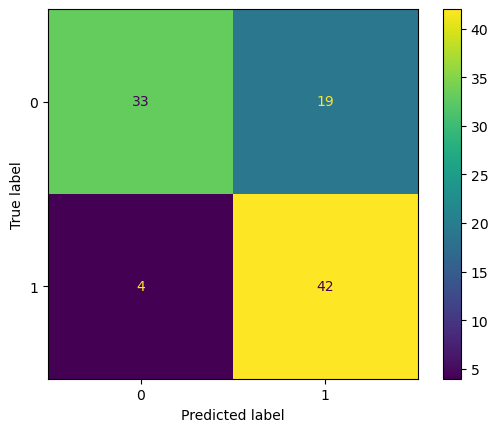

In [66]:
# testing accuracy

y_pred_test = svm_clf.predict(x_test)

plot_confusion_matrix(svm_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

### Standaradization

In [67]:
std_scalar = StandardScaler()

array = std_scalar.fit_transform(x_sample)

x_std_df = pd.DataFrame(array, columns=x_sample.columns)
x_std_df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,-0.533817,0.841886,0.660741,-0.315155,0.710431,0.095449,0.829767,0.279921,0.530640,1.259548,-1.283253,2.362431,-0.430017,-0.273962
1,-0.533817,0.841886,0.660741,3.173040,-0.411789,-0.480885,-1.352636,0.279921,0.530640,0.040065,0.779269,-0.423293,-0.430017,-0.273962
2,-0.533817,0.841886,-1.513453,-0.315155,-0.707409,0.420306,0.548167,0.279921,0.530640,0.040065,0.779269,-0.423293,-0.430017,-0.273962
3,-0.533817,-1.187809,0.660741,-0.315155,1.714970,-0.480885,1.287368,0.279921,0.530640,0.040065,0.779269,-0.423293,-0.430017,-0.273962
4,-0.533817,0.841886,-1.513453,-0.315155,-0.884639,0.098506,-0.331835,0.279921,0.530640,0.040065,0.779269,-0.423293,-0.430017,-0.273962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,-0.533817,0.841886,0.660741,-0.315155,0.698379,-0.480885,-0.155834,0.279921,0.530640,0.040065,-1.283253,-0.423293,2.325488,-0.273962
483,-0.533817,-1.187809,0.660741,-0.315155,-0.115461,-0.480885,0.794567,0.279921,0.530640,-1.179418,0.779269,-0.423293,-0.430017,-0.273962
484,-0.533817,-1.187809,-1.513453,-0.315155,-0.157996,-0.480885,-0.859835,-4.457119,0.530640,-1.179418,0.779269,-0.423293,-0.430017,-0.273962
485,-0.533817,0.841886,-1.513453,-0.315155,0.332577,1.545456,1.181768,0.279921,0.530640,1.259548,-1.283253,2.362431,-0.430017,-0.273962


In [68]:
# For Standardization
x = x_std_df.copy()
y = y_sample

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)


0.8020565552699229

              precision    recall  f1-score   support

           0       0.65      0.88      0.74       128
           1       0.93      0.77      0.84       261

    accuracy                           0.80       389
   macro avg       0.79      0.82      0.79       389
weighted avg       0.83      0.80      0.81       389



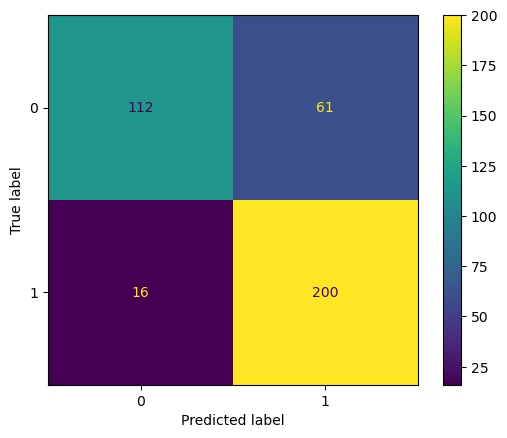

In [69]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
model_details.append("logistic_regression with std_scalar")

y_pred_train = logistic_model.predict(x_train)

plot_confusion_matrix(logistic_model,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)


0.7551020408163265

              precision    recall  f1-score   support

           0       0.56      0.83      0.67        29
           1       0.91      0.72      0.81        69

    accuracy                           0.76        98
   macro avg       0.73      0.78      0.74        98
weighted avg       0.81      0.76      0.77        98



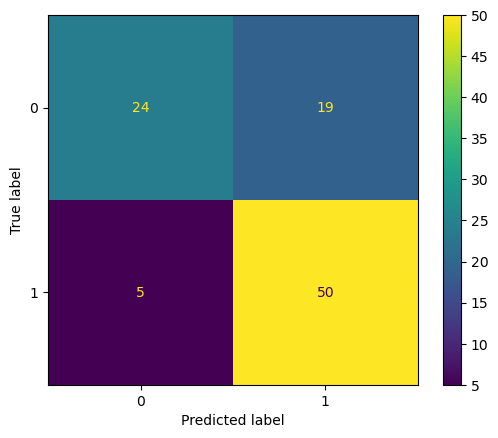

In [70]:
y_pred_test = logistic_model.predict(x_test)

plot_confusion_matrix(logistic_model,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)



print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [71]:
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=11)

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       216

    accuracy                           1.00       389
   macro avg       1.00      1.00      1.00       389
weighted avg       1.00      1.00      1.00       389



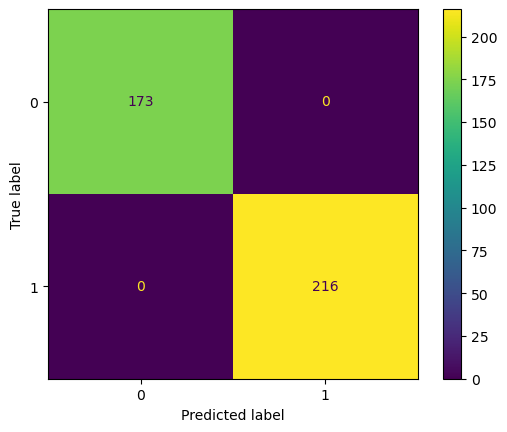

In [72]:
model_details.append("Decision_Tree with std_scalar")

y_pred_train = dt_clf.predict(x_train)

plot_confusion_matrix(dt_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.8571428571428571

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        47
           1       0.84      0.90      0.87        51

    accuracy                           0.86        98
   macro avg       0.86      0.86      0.86        98
weighted avg       0.86      0.86      0.86        98



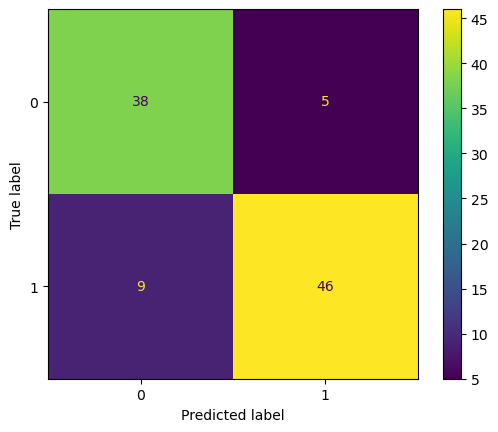

In [73]:
y_pred_test = dt_clf.predict(x_test)

plot_confusion_matrix(dt_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)



print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [74]:
import time
t1 = time.time()

dt_model = DecisionTreeClassifier(random_state=11)

hyperparameter = {"criterion":['gini', 'entropy'], 
                 "max_depth": np.arange(3,8),
                 "min_samples_split": np.arange(2,20),
                 "min_samples_leaf": np.arange(2,15)}  
gscv_dt_clf = GridSearchCV(dt_model, hyperparameter, cv=5,n_jobs=-1)
gscv_dt_clf.fit(x_train, y_train)

t2 = time.time()
print("Required Time :", t2-t1, "sec")

model_details.append("Decision_Tree Hyperparameter tuning with std_scalar")


Required Time : 7.073519229888916 sec


0.8611825192802056

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       157
           1       0.91      0.85      0.88       232

    accuracy                           0.86       389
   macro avg       0.85      0.86      0.86       389
weighted avg       0.87      0.86      0.86       389



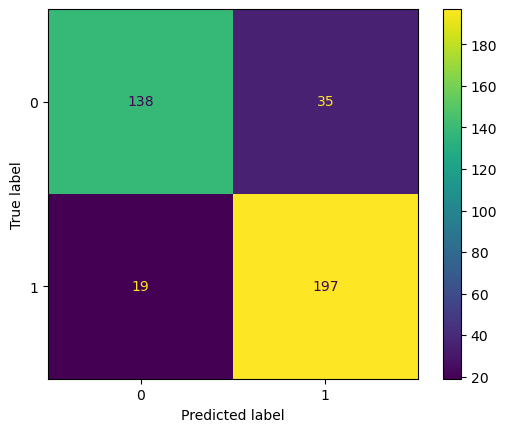

In [75]:
y_pred_train = gscv_dt_clf.predict(x_train)

plot_confusion_matrix(gscv_dt_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.8061224489795918

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        38
           1       0.87      0.80      0.83        60

    accuracy                           0.81        98
   macro avg       0.80      0.81      0.80        98
weighted avg       0.81      0.81      0.81        98



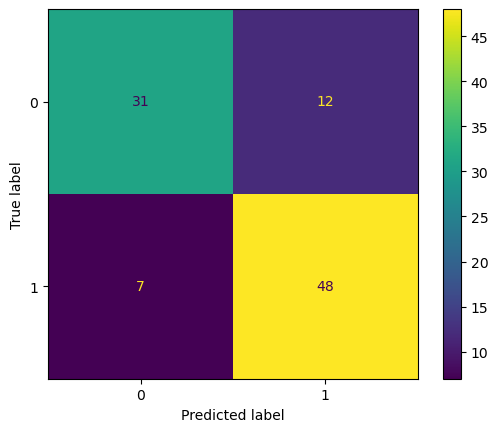

In [76]:
# testing accuracy

y_pred_test = gscv_dt_clf.predict(x_test)

plot_confusion_matrix(gscv_dt_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [77]:
rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(x_train, y_train)
model_details.append("Random Forest with std_scalar")

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       216

    accuracy                           1.00       389
   macro avg       1.00      1.00      1.00       389
weighted avg       1.00      1.00      1.00       389



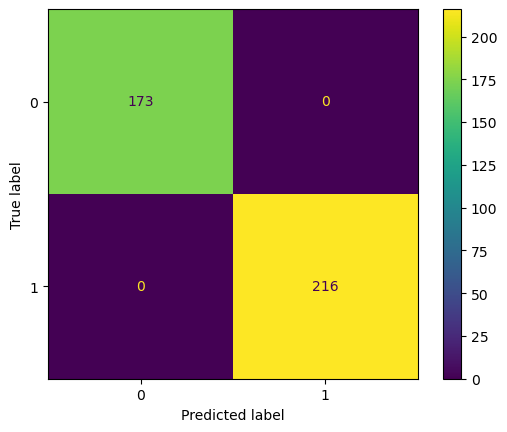

In [78]:
y_pred_train = rf_clf.predict(x_train)

plot_confusion_matrix(rf_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.8979591836734694

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        43
           1       0.91      0.91      0.91        55

    accuracy                           0.90        98
   macro avg       0.90      0.90      0.90        98
weighted avg       0.90      0.90      0.90        98



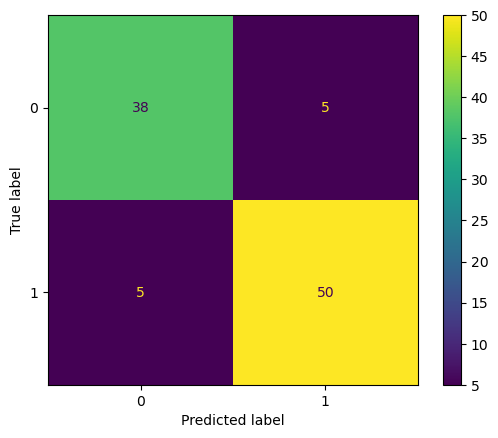

In [79]:
# testing accuracy

y_pred_test = rf_clf.predict(x_test)

plot_confusion_matrix(rf_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [80]:
rf_model = RandomForestClassifier(random_state=10)

param_grid = {
                "n_estimators": np.arange(10,200),
                "criterion" : ['gini', 'entropy'],
                "max_depth" : np.arange(3,8),
                "min_samples_split" : np.arange(4,20),
                "min_samples_leaf": np.arange(3,10),
                "max_features" : ['sqrt', 'log2'],
                "oob_score" : [True]}

gscv_rf_model = RandomizedSearchCV(rf_model, param_grid, cv = 5)
gscv_rf_model.fit(x_train, y_train)

model_details.append("Random _Forest Hyperparameter tuning with std_scalar")


0.8817480719794345

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       133
           1       0.99      0.83      0.90       256

    accuracy                           0.88       389
   macro avg       0.87      0.90      0.88       389
weighted avg       0.91      0.88      0.88       389



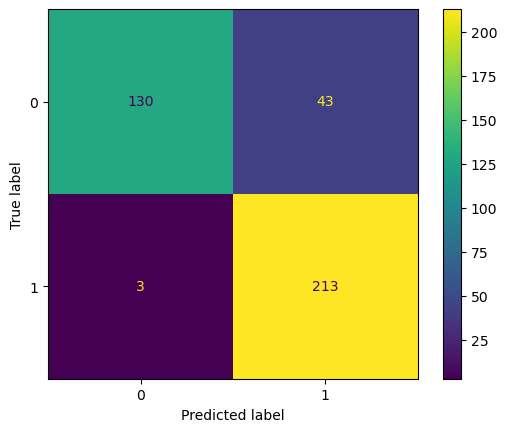

In [81]:
# Training Accuracy


y_pred_train = gscv_rf_model.predict(x_train)

plot_confusion_matrix(gscv_rf_model,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.8163265306122449

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        33
           1       0.93      0.78      0.85        65

    accuracy                           0.82        98
   macro avg       0.80      0.83      0.81        98
weighted avg       0.84      0.82      0.82        98



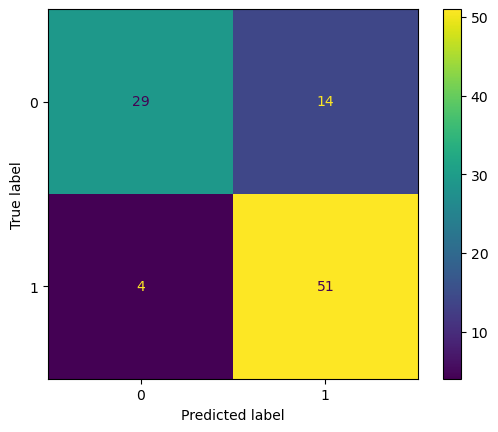

In [82]:
#testing accuracy

y_pred_test = gscv_rf_model.predict(x_test)

plot_confusion_matrix(gscv_rf_model,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [83]:
adb_clf = AdaBoostClassifier(random_state=30)
adb_clf.fit(x_train, y_train)

model_details.append("AdaBost with std_scalar")

0.8946015424164524

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       154
           1       0.95      0.87      0.91       235

    accuracy                           0.89       389
   macro avg       0.89      0.90      0.89       389
weighted avg       0.90      0.89      0.90       389



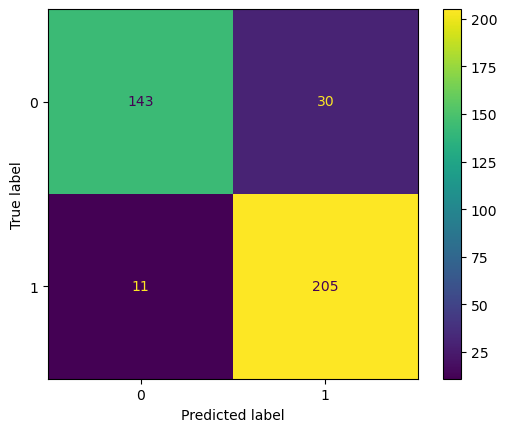

In [84]:
y_pred_train = adb_clf.predict(x_train)

plot_confusion_matrix(adb_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.8367346938775511

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        43
           1       0.85      0.85      0.85        55

    accuracy                           0.84        98
   macro avg       0.83      0.83      0.83        98
weighted avg       0.84      0.84      0.84        98



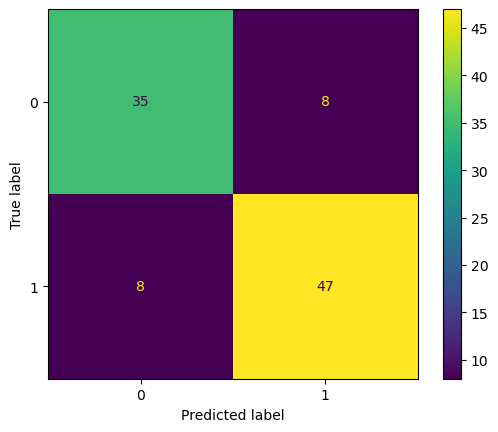

In [85]:
y_pred_test = adb_clf.predict(x_test)

plot_confusion_matrix(adb_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [86]:
adb_clf = AdaBoostClassifier(random_state=30)

param_grid = {
            "n_estimators" : np.arange(10,200,2),
            "learning_rate" : np.arange(0,2,0.001)
                }

gscv_adb_clf = RandomizedSearchCV(adb_clf, param_grid, cv=7)
gscv_adb_clf.fit(x_train, y_train)
gscv_adb_clf.best_estimator_
model_details.append("AdaBost_hyperparameter_tuning with std_scalar")

0.9562982005141388

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       170
           1       0.97      0.95      0.96       219

    accuracy                           0.96       389
   macro avg       0.95      0.96      0.96       389
weighted avg       0.96      0.96      0.96       389



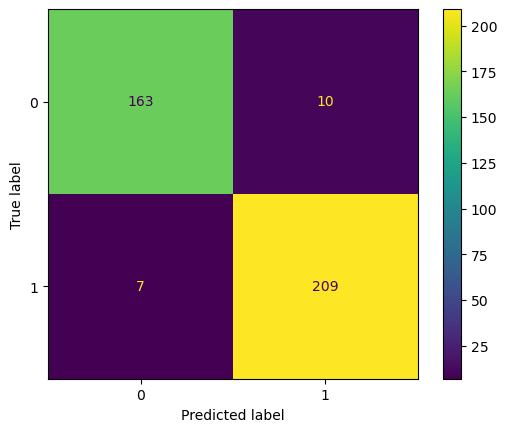

In [87]:
y_pred_train = gscv_adb_clf.predict(x_train)

plot_confusion_matrix(gscv_adb_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.8163265306122449

              precision    recall  f1-score   support

           0       0.81      0.78      0.80        45
           1       0.82      0.85      0.83        53

    accuracy                           0.82        98
   macro avg       0.82      0.81      0.81        98
weighted avg       0.82      0.82      0.82        98



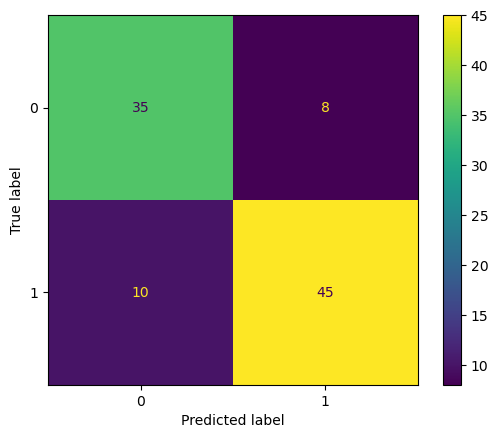

In [88]:
y_pred_test = gscv_adb_clf.predict(x_test)

plot_confusion_matrix(gscv_adb_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [89]:
column_names = x.columns
column_names

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+'],
      dtype='object')

### knn on standardized data

In [90]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

model_details.append("knn_with std_scalar")

0.8688946015424165

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       158
           1       0.92      0.86      0.89       231

    accuracy                           0.87       389
   macro avg       0.86      0.87      0.87       389
weighted avg       0.87      0.87      0.87       389



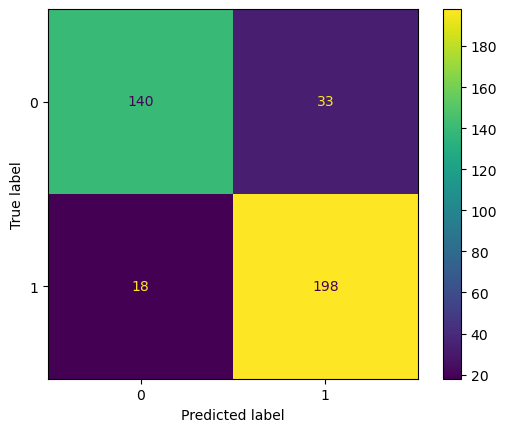

In [91]:
# Training Accuracy

y_pred_train = knn_clf.predict(x_train)

plot_confusion_matrix(knn_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.7959183673469388

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        43
           1       0.82      0.82      0.82        55

    accuracy                           0.80        98
   macro avg       0.79      0.79      0.79        98
weighted avg       0.80      0.80      0.80        98



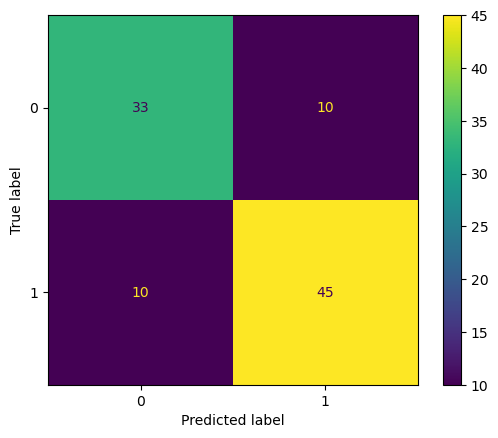

In [92]:
# testing accuracy

y_pred_test = knn_clf.predict(x_test)

plot_confusion_matrix(knn_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

### Knn(standardiztion) With Hyperparameter tunning

In [93]:
knn_clf = KNeighborsClassifier()

param_grid = {"n_neighbors" : np.arange(3,30),
                  "p": [1,2]}
#              "cv": np.arange(5,10)} # Param_grid

gscv_knn_clf = GridSearchCV(knn_clf, param_grid, cv = 5 , n_jobs = -1)  # cv=5
gscv_knn_clf.fit(x_train, y_train) 
gscv_knn_clf.best_estimator_

model_details.append("knn(standardization)with_Hyperparameter Tuning")

0.87146529562982

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       171
           1       0.89      0.88      0.88       218

    accuracy                           0.87       389
   macro avg       0.87      0.87      0.87       389
weighted avg       0.87      0.87      0.87       389



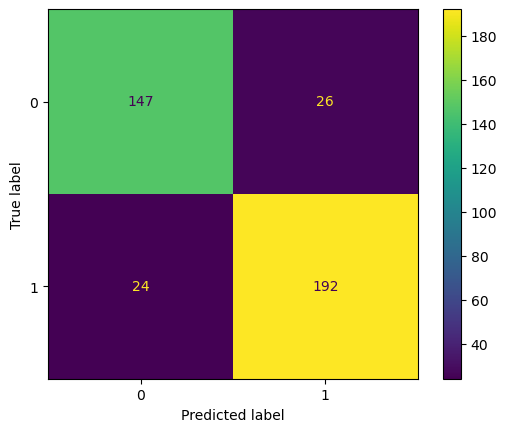

In [94]:
# Training Accuracy

y_pred_train = gscv_knn_clf.predict(x_train)

plot_confusion_matrix(gscv_knn_clf,x_train,y_train)

accuracy =  accuracy_score(y_pred_train,y_train)

clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.8367346938775511

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        47
           1       0.82      0.88      0.85        51

    accuracy                           0.84        98
   macro avg       0.84      0.83      0.84        98
weighted avg       0.84      0.84      0.84        98



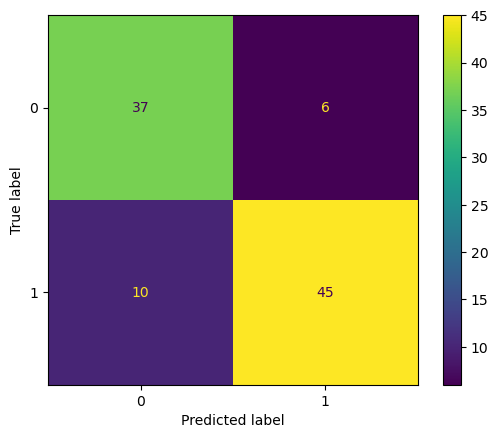

In [95]:
# testing accuracy

y_pred_test = gscv_knn_clf.predict(x_test)

plot_confusion_matrix(gscv_knn_clf,x_test,y_test)

accuracy =  accuracy_score(y_pred_test,y_test)

clf_report = classification_report(y_pred_test,y_test)


print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

### overall comparision

In [96]:
comparison_df = pd.DataFrame({"Models": model_details, "Testing Accuracy": testing_accuracy_list, "Training Accuracy": training_accuracy_list})
comparison_df

,Models,Testing Accuracy,Training Accuracy
0,logistic_regression_with_normal_scalar,0.765306,0.794344
1,Decision_Tree_normal_scalar,0.908163,1.000000
2,Decision_Tree_Hyperparameter tuning_with_norma...,0.826531,0.871465
3,Random Forest with normal_scalar,0.908163,1.000000
4,Random _Forest Hyperparameter tuning with nor...,0.806122,0.861183
5,AdaBost with normal_scalar,0.806122,0.897172
6,AdaBost hyperparameter_tuning with normal_scalar,0.867347,0.976864
7,Knn_Normalization Model,0.755102,0.853470
8,knn_normalized_model_with_Hyperparameter Tuning,0.816327,0.925450
9,SVM with normal_scalar,0.765306,0.812339


### saving model 

In [97]:
# creating pickle file of model

In [98]:
import pickle

In [99]:
with open ("rf_scaled_model.pkl","wb")as f:
    pickle.dump(rf_clf,f)

In [100]:
# creating json file 

In [101]:
column_names = x.columns
column_names

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+'],
      dtype='object')

In [102]:
json_data = {"Gender":Gender,
        "Married":Married,
        "Education":Education,
        "Self_Employed":Self_Employed,
         "Property_Area":Property_Area,
        "Loan_Status" :Loan_Status,
       "columns":list(column_names)}

In [103]:
import json

In [104]:
with open ("json_file.json","w")as f:
    json.dump(json_data,f)

### single user input testing

In [105]:
Gender = "Male"
Married = "Yes"
Education = "Graduate"
Self_Employed = "No"
ApplicantIncome = 4583
CoapplicantIncome = 1508.0
LoanAmount = 128.0
Loan_Amount_Term = 360.0
Credit_History = 1.0
Property_Area = "Rural"
Dependents = 1



In [106]:
Dependents = "Dependents_" + str(Dependents)
Dependents

'Dependents_1'

In [107]:
# Dependents_index = np.where(column_names == Dependents)[0][0]
# Dependents_index

In [108]:
Dependents_index = list(column_names).index(Dependents)
Dependents_index

11

In [110]:
array = np.zeros(len(column_names))

array[0] = json_data["Gender"][Gender]
array[1] = json_data["Married"][Married]
array[2] = json_data["Education"][Education]
array[3] = json_data["Self_Employed"][Self_Employed]


array[4] = ApplicantIncome
array[5] = CoapplicantIncome
array[6] = LoanAmount
array[7] = Loan_Amount_Term 
array[8] = Credit_History
array[9] = json_data["Property_Area"][Property_Area]
array[Dependents_index] = 1

array

    

array([0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 4.583e+03, 1.508e+03,
       1.280e+02, 3.600e+02, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00])

In [114]:
with open ("scaled_model.pkl","wb")as f:
    pickle.dump(normal_scalar,f)

In [112]:
scaled_array = normal_scalar.transform([array])

In [113]:

loan_status = rf_clf.predict([array])[0]
print(loan_status)
if loan_status == 1:
    print("loan_status",loan_status)
    print("loan is approved")
else:
    print("loan is not approved")

0
loan is not approved
